In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
from sklearn import metrics

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#Load data
import pandas as pd

def load_wine_data():
    csv_path = os.path.join(r"C:\Users\Sam van Pomeren\Desktop\HWUK\F21DL", "wine.csv")
    return pd.read_csv(csv_path)

#Print data
wine = load_wine_data()
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Introduction
In this section the clustering algorithms will be tested. Starting with the standed excercises from the tutorial, followed by some research on the personal dataset.

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

X = wine.iloc[:,0:11]
y = wine.iloc[:,-1] 

k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
agglom = AgglomerativeClustering(n_clusters=k, compute_distances=True)
gauss = GaussianMixture(n_components=k, random_state=0)
y_pred = kmeans.fit_predict(X)
y_pred_agglom = agglom.fit_predict(X)
y_pred_gauss = gauss.fit_predict(X)

print(y_pred)
print(y_pred_agglom)
print(y_pred_gauss)





[3 0 0 ... 3 3 3]
[3 0 0 ... 3 0 3]
[0 0 0 ... 1 1 5]


In [3]:
y_pred is kmeans.labels_

True

In [4]:
kmeans.cluster_centers_

array([[8.23702422e+00, 5.20276817e-01, 2.76124567e-01, 2.40847751e+00,
        9.52145329e-02, 2.50034602e+01, 6.17439446e+01, 9.96899135e-01,
        3.32363322e+00, 6.84913495e-01, 1.03016724e+01],
       [8.62107023e+00, 5.12959866e-01, 2.87575251e-01, 2.42525084e+00,
        8.40217391e-02, 7.47826087e+00, 1.84899666e+01, 9.96637408e-01,
        3.29968227e+00, 6.53795987e-01, 1.06422520e+01],
       [8.02054795e+00, 5.64178082e-01, 3.10684932e-01, 3.27123288e+00,
        9.05890411e-02, 3.16095890e+01, 1.33205479e+02, 9.97217534e-01,
        3.24547945e+00, 7.08767123e-01, 9.76164384e+00],
       [8.22828508e+00, 5.26436526e-01, 2.41759465e-01, 2.39554566e+00,
        8.63563474e-02, 1.54977728e+01, 3.89755011e+01, 9.96686949e-01,
        3.32928731e+00, 6.47973274e-01, 1.04419822e+01],
       [7.90000000e+00, 3.00000000e-01, 6.80000000e-01, 8.30000000e+00,
        5.00000000e-02, 3.75000000e+01, 2.83500000e+02, 9.93160000e-01,
        3.01000000e+00, 5.10000000e-01, 1.23000000e+

In [5]:
print(kmeans.labels_)
print(agglom.labels_)

[3 0 0 ... 3 3 3]
[3 0 0 ... 3 0 3]


In [6]:
kmeans.transform(X)

array([[ 31.10875737,  16.01388945, 101.33649761,   6.86527473,
        251.00397526,  60.9053697 ],
       [  5.32225881,  51.59338141,  66.53985319,  29.60580283,
        216.95187512,  26.74657199],
       [ 12.67323273,  36.31889649,  80.93512904,  15.05616612,
        230.69344394,  40.50108352],
       ...,
       [ 22.20491616,  30.51960793,  93.27151985,  13.6905091 ,
        243.73207213,  54.02757497],
       [ 19.22341492,  35.49619661,  89.24249745,  17.41539023,
        239.6651557 ,  50.50892361],
       [ 21.11565998,  25.92083436,  92.24694269,   4.71584861,
        242.34294171,  51.96591801]])

In [7]:
kmeans_iter1 = KMeans(n_clusters=6, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=6, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=6, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)

kmeans_iteropt = KMeans(n_clusters=6, init="random", n_init=1,
                     algorithm="full", random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
kmeans_iteropt.fit_predict(X)


array([5, 0, 4, ..., 4, 4, 4])

In [8]:
print(kmeans_iter1.inertia_)
print(kmeans_iter2.inertia_)
print(kmeans_iter3.inertia_)
print(kmeans_iteropt.inertia_)


360619.673650818
301160.7709131922
283655.05031322286
193446.10082452712


In [9]:
kmeans_per_k = [KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", random_state=1).fit(X)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[1914079.6278043417, 691909.8671253193, 395309.18345559755, 283160.6091504805, 221659.44644647645, 193446.10082452712, 177468.31349097943, 159874.45462706956, 152486.8690212153, 146380.75587579454, 143287.42815612775, 135870.1212595987, 117203.94685020002, 112629.0311078318, 76365.16992421394, 122330.3551483429, 102697.77756512737, 100601.80230913228, 98265.93953143091]


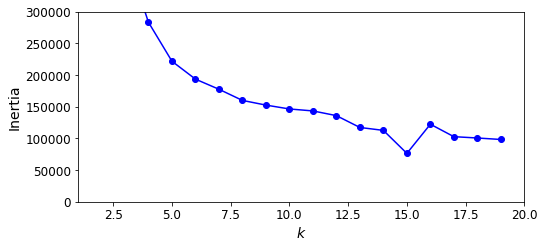

In [10]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

            
plt.axis([1, 20, 0, 300000])
plt.show()

## Compare to orignally given quality

In [11]:
y_array = np.array(y)
y_pred_array = kmeans_iteropt.labels_
agglom_array = np.array(y_pred_agglom)
gauss_array = np.array(y_pred_gauss)
print(y_array.shape)
print(y_pred_array.shape)

(1599,)
(1599,)


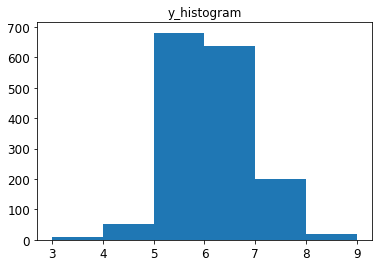

In [12]:
plt.hist(y_array, bins = [3,4,5,6,7,8,9]) 
plt.title("y_histogram") 
plt.show()

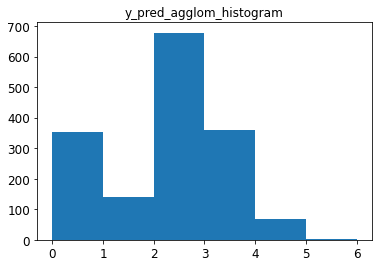

In [13]:
plt.hist(agglom_array, bins = [0,1,2,3,4,5,6]) 
plt.title("y_pred_agglom_histogram") 
plt.show()

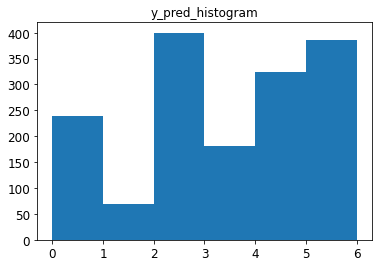

In [14]:
plt.hist(y_pred_array, bins = [0,1,2,3,4,5,6]) 
plt.title("y_pred_histogram") 
plt.show()

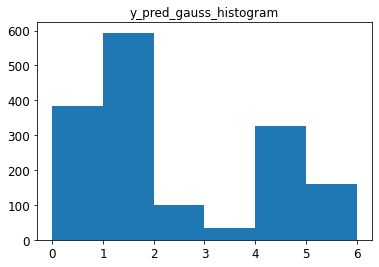

In [15]:
plt.hist(gauss_array, bins = [0,1,2,3,4,5,6]) 
plt.title("y_pred_gauss_histogram") 
plt.show()

In [16]:
y_pred_replaced = np.where(y_pred_array==0, 4, y_pred_array)
y_pred_replaced = np.where(y_pred_array==1, 3, y_pred_array)
y_pred_replaced = np.where(y_pred_array==2, 5, y_pred_array)
y_pred_replaced = np.where(y_pred_array==3, 8, y_pred_array)
y_pred_replaced = np.where(y_pred_array==4, 7, y_pred_array)
y_pred_replaced = np.where(y_pred_array==5, 6, y_pred_array)

print(y_pred_replaced)

#find loop to run through all possibillities...

[6 0 4 ... 4 4 4]


In [17]:
def calc_accuracy(X,Y):
    correct = 0
    for i in range(1599):
        if X[i] == Y[i]:
            correct +=1

    accuracy = (correct/1599)*100
    print(accuracy)

In [18]:
from sklearn import metrics

print("Self-designed accuracy score")
calc_accuracy(y_pred_replaced, y_array)
calc_accuracy(y_pred_array,agglom_array)
calc_accuracy(y_pred_array,gauss_array)
calc_accuracy(gauss_array,agglom_array)
print(" ")
print("Metrics rand_ accuracy score")
print(metrics.rand_score(y_array, y_pred_replaced))
print(metrics.rand_score(y_array, y_pred_array))
print(metrics.rand_score(y_array, agglom_array))
print(metrics.rand_score(y_array, gauss_array))

Self-designed accuracy score
11.694809255784866
39.64978111319575
8.005003126954346
10.819262038774234
 
Metrics rand_ accuracy score
0.5872498534362449
0.5872498534362449
0.5569876667285013
0.6009223536925847


## Conclusions

The Inertia score for the K means algorithm got to a minimum of 19000. The cluster graph shows that it might be benefitial to grade the wines using a more precise scale, using 5,5 -7,5 etc.The histograms show that this algorithm does work a lot better than the bayesian algorithm, as the classes are much better filled then just the middle ones. I am not sure on the results of the other algorithms, I could not find a good way to test their accuracy on this data set. I compared them to the K-means algorithm which I thought was the most developed algorithm. Considering this I would give the agglomerative clustering the chance to proof itself in further development. 

After using rand_score accuracy I would give the gaussian clustering the benefit for further development, as well as being happy about the result of the K-means.

Pros: quick and easy to use on larger data sets
Cons: It suffers from singularities

